# Exercise 1: Setting Up the Environment

1. Install the Required Library:

In [ ]:
!pip install pgmpy


2. Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Building a Simple Bayesian Network

1. Define the Structure:

In [ ]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

2. Define Conditional Probability Tables (CPTs):

In [ ]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.6], [0.4]])

cpd_traffic = TabularCPD(variable='Traffic', variable_card=2, values=[[0.8, 0.3], [0.2, 0.7]], evidence=['Weather'], evidence_card=[2])

cpd_late = TabularCPD(variable='Late', variable_card=2, values=[[0.9, 0.4], [0.1, 0.6]], evidence=['Traffic'], evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

# Exercise 3: Querying the Bayesian Network


In [ ]:
inference = VariableElimination(model)

query_result = inference.query(variables=['Late'], evidence={'Weather': 0})  # 0 for Sunny
print(query_result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.8000 |
+---------+-------------+
| Late(1) |      0.2000 |
+---------+-------------+


# Exercise 4: Parameter Learning

1. Simulate a Dataset:

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'Weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 0].shape[0], p=[0.9, 0.1])
data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice([0, 1], size=data[data['Weather'] == 1].shape[0], p=[0.3, 0.7])

# Calculate the size of the 'Late' column
size = data['Late'].shape[0]

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0, 1], size=size, p=[0.95, 0.05]), # Use the size of the 'Late' column
    np.random.choice([0, 1], size=size, p=[0.4, 0.6])    # Use the size of the 'Late' column
)

print(data.head())

   Weather  Traffic  Late
0        0      0.0     0
1        0      0.0     0
2        1      1.0     0
3        0      0.0     0
4        0      1.0     1


2. Estimate the Parameters:

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.811 |
+------------+-------+
| Weather(1) | 0.189 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.8828606658446363  | 0.31746031746031744 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.11713933415536375 | 0.6825396825396826  |
+--------------+---------------------+---------------------+
+---------+---------------------+---------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)        |
+---------+---------------------+---------------------+
| Late(0) | 0.9523195876288659  | 0.44642857142857145 |
+---------+---------------------+---------------------+
| Late(1) | 0.04768041237113402 | 0.5535714285714286  |
+---------+---------------------+---------------------+


# Exercise 5: Visualizing the Bayesian Network

1. Visualize the Network Structure:

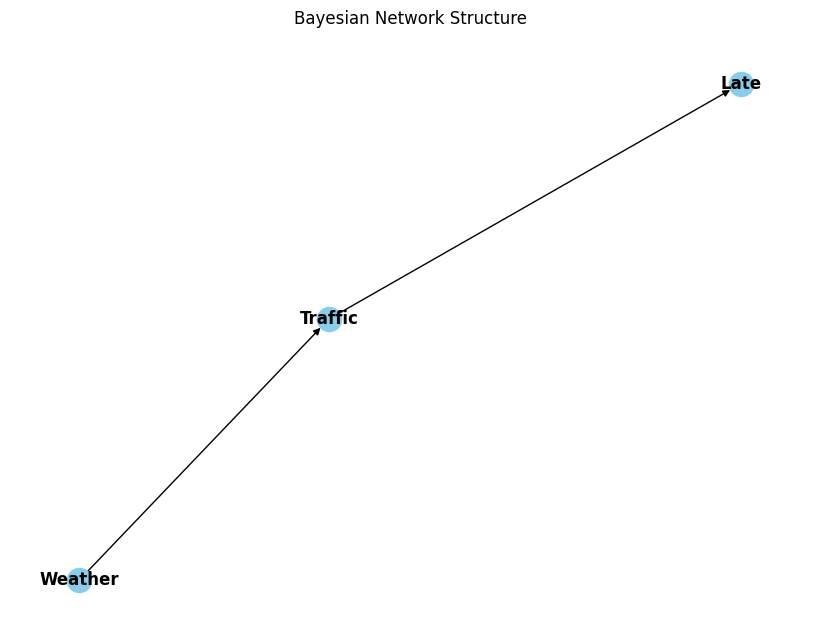

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
nx_graph = nx.DiGraph()
nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='skyblue', font_weight='bold', arrows=True)
plt.title('Bayesian Network Structure')
plt.show()